   # Сборный проект

***Цель работы*** - выявить закономерности, определяющие успешность продаж компьютерных игр, которые позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

***Ход исследования:***

Из открытых источников нам доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и игровые платформы.

Для качественного исследования нам потребуется изучить данные и выполнить их предобработку, а именно: заполнить пропуски, избавиться от дубликатов, если таковые будут в нашем датасете, добавить новые столбцы, изменить тип данных, где это потребуется.

Затем перейдем непосредственно к исследовательскому анализу данных и поиску интересных особенностей и зависимостей, которые существуют на рынке продаж компьютерных игр.

Таким образом, исследование пройдёт в несколько этапов:

- Обзор данных.
- Предобработка данных.
- Исследовательский анализ данных (поиск закономерностей).
- Проверка гипотез и выводы.

### Откроем файл с данными и изучим общую информацию. 

#### Откроем файл `/datasets/games.csv`, сохраним датафрейм в переменную `data`.

In [1]:
# импортируем библиотеки pandas и matplotlib.pyplot 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np

# считаем данные из csv-файла в датафрейм и сохраним в переменную data
try:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

#### Выведем первые 10 строк датафрейма `data`.

In [2]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


#### Выведем основную информацию для датафрейма data с помощью метода info()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Предобработка данных

#### Проверим наш датасет на наличие явных дубликатов

In [4]:
data.duplicated().sum()

0

Проверка на дубликаты - основа предобработки данных. В нашем датасете явных дубликатов не обнаружено.

#### Заменим названия столбцов (приведем к нижнему регистру)

In [5]:
data = data.rename(columns={'Name':'name', 'Platform':'platform', 'Year_of_Release':'year_of_release', 
                            'Genre':'genre', 'Other_sales':'other_sales', 'Critic_Score':'critic_score', 
                            'User_Score':'user_score', 'Rating':'rating'})

Названия колонок с географическими названиями (точнее, с сокращениями: NA_sales - North America sales) оставим без изменений.

#### Измение типа данных колонок

Преобразуем типы данных колонок датафрейма согласно тем значениям, которые в них хранятся.

Тип данных колонки 'year_of_release' изменим на целый числовой (ведь год - это целое число). Но сначала избавимся от пропусков. Их всего 2% от всех данных, поэтому просто заполним пустые значения нулями, чтобы не искажать результаты нашего исследования.

In [6]:
# количество пустых значений NaN 
print('Количество пустых строк до', data['year_of_release'].isna().sum())

# заменим пропуски на 0
data['year_of_release'] = data['year_of_release'].fillna(0)

# количество пустых значений NaN 
print('Количество пустых строк после', data['year_of_release'].isna().sum())

# заменим тип данных на целый
data['year_of_release'] = data['year_of_release'].astype('int')

Количество пустых строк до 269
Количество пустых строк после 0


Для того, что изменить тип данных в колонке user_score на float, сначала нужно избавиться от значения 'tbd'. Оно расшифровывается как to be determined - "будет определено". То есть, конкретное значение не известно, поэтому заменим его на Nan. А затем уже поменяем тип данных на float.

In [7]:
# количество пустых значений NaN 
print('Количество пустых строк до', data['user_score'].isna().sum())

# замена значения 'tbd' на NaN
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.NaN

# количество пустых значений NaN
print('Количество пустых строк после', data['user_score'].isna().sum())

# заменим тип данных столбца user_score на float
data['user_score'] = data['user_score'].astype('float')

Количество пустых строк до 6701
Количество пустых строк после 9125


In [8]:
# выведем информацию о нашем датафрейме после преобразования типов
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


#### Обработка пропусков

##### Проверка данных на пропуски

In [9]:
# выведем процент пропущенных значений по каждому столбцу
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,55.000000


In [10]:
# выведем количество пропущенных значений для каждого столбца
data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Видим, что больше всего пропусков приходится на колонки critic_score, user_score и rating. Процент пропусков в них довольно большой, близкий к 50%. Если мы удалим эти строки с пропусками, то потеряем почти половину данных, что может исказить результаты нашего исследования. 

Также по 2 пропуска имеется в колонках 'name' и 'genre'. Т.к. такое количество записей пренебрежимо мало по сравнению с общим числом строк, то допустимо удалить эти строки. 

Пропуски в колонке 'rating' заменим на значение-заглушку "unknown".

In [11]:
# удалим строки с пропусками
data = data.dropna(subset=['name'])
data = data.dropna(subset=['genre'])

# заменим пропуски на 'unknown'
data['rating'] = data['rating'].fillna('unknown')

Снова выведем количество пропущенных значений для каждого столбца датафрейма.

In [12]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
NA_sales              0
EU_sales              0
JP_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
dtype: int64

Теперь пропуски присутствуют только в колонках critic_score, user_score. Оставим пропуски в этих колонках без изменений, так как мы не можем ни заполнить их на основе имеющейся информации, ни удалить, так как это приведет к потере данных.

В колонке rating избавимся от редких значений, заменив их на аналогичные.

In [13]:
# выведем уникальные значения колонки 'rating'
print(data['rating'].value_counts())

# заменим редкие значения 'EC' и 'K-A' на Е, ведь эти рейтинги аналогичны
data.loc[data['rating'] == 'EC', 'rating'] = 'E'
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'

# снова выведем уникальные значения колонки 'rating'
display(data['rating'].value_counts())

unknown    6764
E          3990
T          2961
M          1563
E10+       1420
EC            8
K-A           3
RP            3
AO            1
Name: rating, dtype: int64


unknown    6764
E          4001
T          2961
M          1563
E10+       1420
RP            3
AO            1
Name: rating, dtype: int64

#### Добавим дополнительный признак - суммарные продажи во всех регионах

In [14]:
data['total_sales'] = data['NA_sales'] + data['EU_sales'] + data['JP_sales'] + data['other_sales']

### Исследовательский анализ данных

#### Изучим, сколько игр выпускалось в разные годы, и определим, важны ли данные за все периоды

In [15]:
#data.groupby('year_of_release')['genre'].count()
data.pivot_table(index=['year_of_release'], values='genre', aggfunc='count')

,genre
year_of_release,
0,269
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16


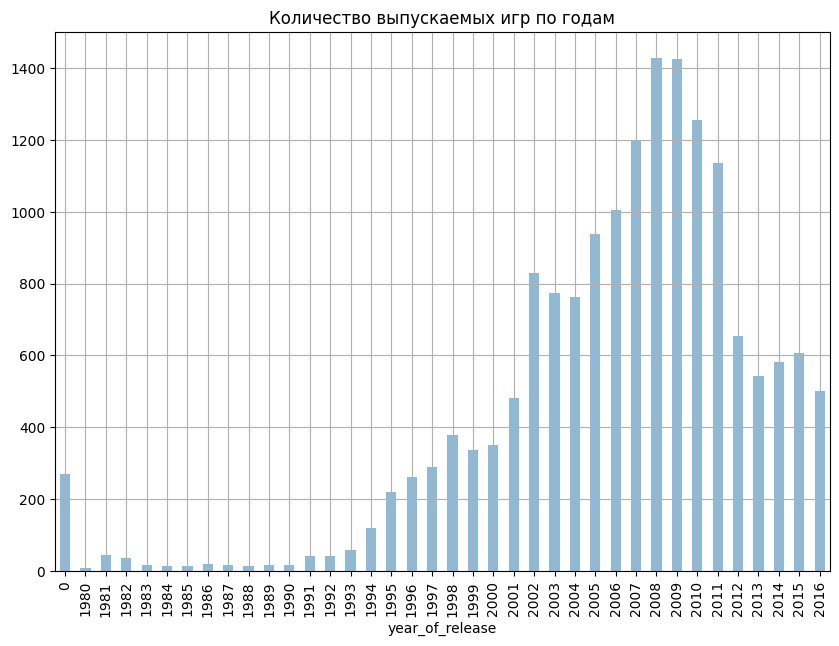

In [16]:
# построим график, на котором отобразим количество выпускаемых игр по годам
(
data.pivot_table(index=['year_of_release'], values='genre', aggfunc='count').reset_index()
    .plot(x='year_of_release', y='genre', kind='bar', alpha=0.5, xlim=(0, 2017), ylim=(0, 1500), 
          title='Количество выпускаемых игр по годам', figsize=(10, 7), legend=False, grid=True)
)
plt.show()

На графике видно, что большой рост числа выпускаемых в год компьютерных игр пришелся на начало двухтысячных, с пиком в 2008-2009 годы. Затем количество выпускаемых игр пошло на спад, причем, резкий спад прозошел в 2012 году, после чего число выпускаемых в год игр ощутимо не менялось, т.е. стабилизировалось на уровне около 550 игр в год.

Для получения актуальных и полных данных исключим из исследования данные до 2000 года включительно, т.к. количество выпускаемых игр в эти годы было относительно невелико, а информация по ним рискует быть устаревшей и бесполезной.   

In [17]:
# сделаем срез данных за последние 16 лет
data = data.query('2000 < year_of_release < 2017')

#### Посмотрим, как менялись продажи по платформам, выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 

In [18]:
# посчитаем суммарные продажи по каждой платформе и отсортируем значения по убыванию
data.query('year_of_release != 0').groupby(['platform']).agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS2,1194.39
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS4,314.14
GBA,312.81
PSP,289.53
3DS,257.81


Построим график, который покажет, как менялись доли продаж игр на разных платформах в разные годы.

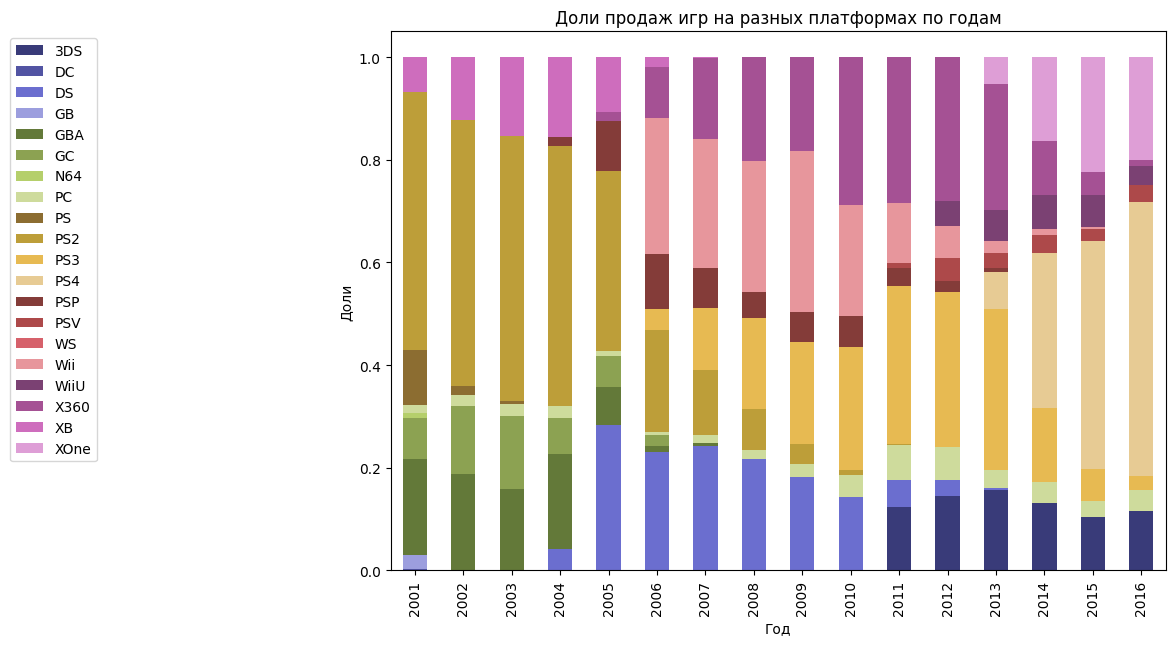

In [19]:
# создадим датафрейм, в котором будем хранить общие продажи (всех игр на всех платформах) за каждый год
sales_by_year = data.groupby(['year_of_release']).agg({'total_sales':'sum'}) 

# добавим к нашему основному датафрейму data данные по общим продажам за год из датафрейма sales_by_year
data = data.merge(sales_by_year, on='year_of_release', suffixes=('', '_in_year'))

# добавим в датафрейм новую колонку, которая будет хранить долю продаж за год для каждой платформы
data['share_sales'] = data['total_sales'] / data['total_sales_in_year']

# создадим сводную таблицу, по которой будем строить график
platforms_by_year = data.pivot_table(index=['year_of_release'], columns='platform', values='share_sales', aggfunc='sum')

# построим график изменения доли продаж по платформам за разные годы
platforms_by_year.plot.bar(
    stacked=True, figsize=(10, 7), title='Доли продаж игр на разных платформах по годам', colormap='tab20b'
)
plt.legend(bbox_to_anchor=(-0.5, 1), loc='upper left', ncol=1)
plt.xlabel('Год')
plt.ylabel('Доли')
plt.show()

На графике можно проследить, как меняется доля продаж игр на разных платформах в течение нескольких лет и как одни платформы, более современные, приходят на смену другим, устаревшим, платформам. Этот график характеризует своеобразный "жизненный цикл" игровых платформ: в начале, когда платформа еще достаточно новая, игры для нее выпускаются и продаются не так активно; по мере того, как платформа набирает популярность, растут и продажи по играм, выпущенным под нее. С течением времени и по мере развития технологий появляются более современные и производительные платформы, которые постепенно заменяют предыдущие поколения платформ. Например, популярная в начале двухтысячных платформа PS2 через 10 лет практически полностью вытеснилась своей усовершенствованной версией PS3, которую, в свою очередь, вытеснила еще более современная платформа PS4.

#### Определим, за какой характерный срок появляются новые и исчезают старые платформы.

,first,last,age
platform,,,
DC,2001,2008,7
GB,2001,2001,0
GBA,2001,2007,6
GC,2001,2007,6
N64,2001,2002,1
PC,2001,2016,15
PS,2001,2003,2
PS2,2001,2011,10
WS,2001,2001,0


Средний "возраст" игровых платформ: 7 лет


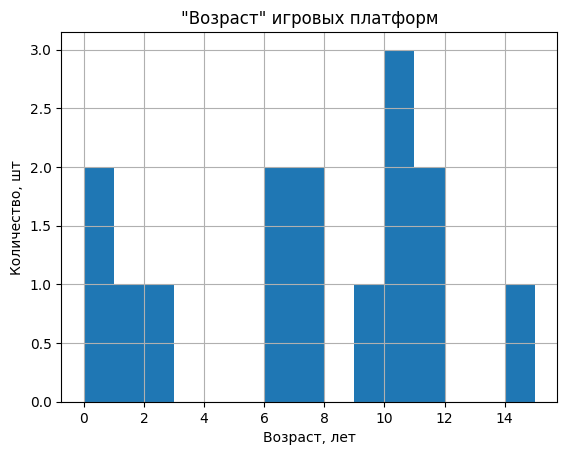

In [20]:
# создадим вспомогательный датафрейм, который будет хранить первую и последнюю игру, вышедшую на данной платформе
first_last = (
    data.sort_values(by='year_of_release').groupby(['platform'])
    .agg(first=('year_of_release', 'first'), last=('year_of_release', 'last'))
)

# добавим столбец, в котором сохраним "возраст" платформы
first_last['age'] = first_last['last'] - first_last['first']

# учтем, что возраст платформ, которые в последний раз встретились в 2016 году, еще не окончателен: уберем из таблицы "молодые"
# платформы, для которых в последний раз выпускались игры в 2016 году и оставим "старичков" - платформы старше 9 лет
first_last = first_last.query('(last != 2016) or ((last - first) > 9)')
display(first_last.sort_values(by='first'))

print('Средний "возраст" игровых платформ:', int(first_last['age'].mean()), 'лет')

# построим гистограмму возрастов платформы
first_last['age'].hist(bins=len(first_last))
plt.title('"Возраст" игровых платформ')
plt.xlabel('Возраст, лет')
plt.ylabel('Количество, шт')
plt.show()

Мы определили, что средний "возраст" игровых платформ - 7 лет. Также выявили платформу-долгожителя - это PC (компьютер) - она существует на протяжении всех лет, по которым мы проводим исследование. Что вполне согласуется с реальными данными, ведь компьютер - самая распространенная игровая платформа, и для нее всегда выпускаются компьютерные игры.

#### Посмотрим, как менялись продажи по платформам

Построим линейный график с продажами для каждой платформы по годам

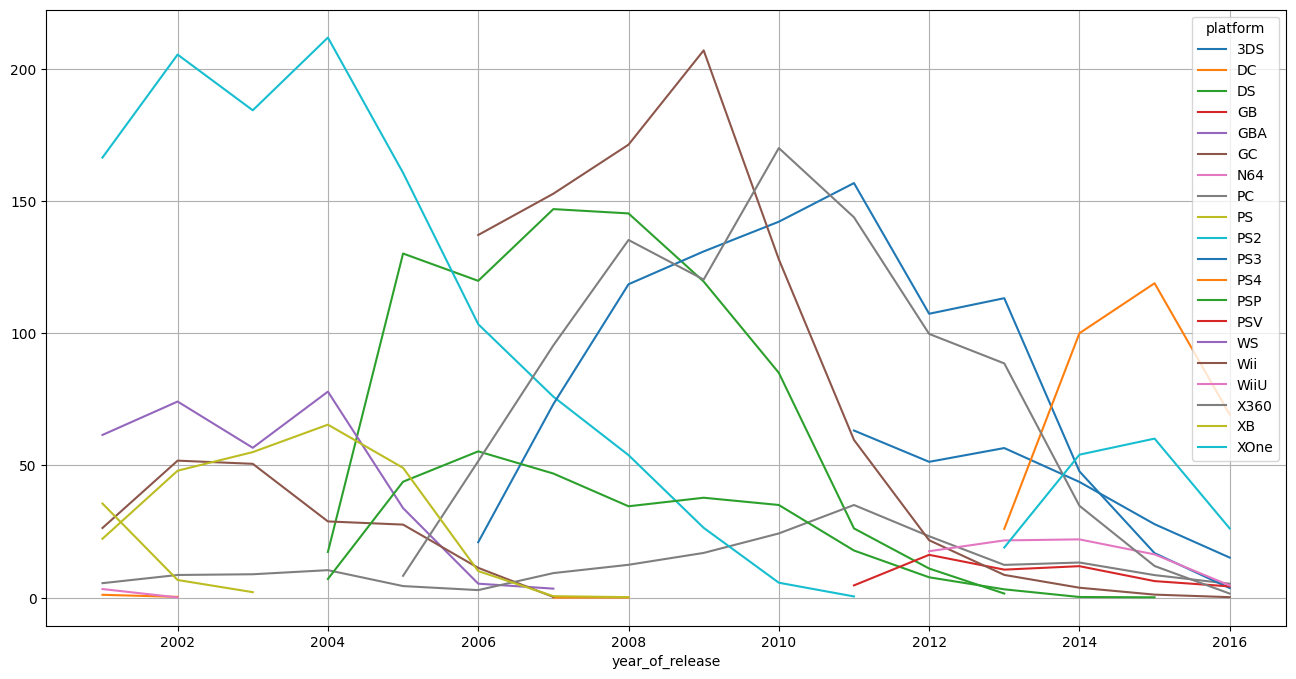

In [21]:
data_graph = data.pivot_table(index="year_of_release", columns="platform", values="total_sales", aggfunc="sum")
data_graph.plot(figsize=(16, 8), grid=True)
plt.show()

Для прогнозирования продаж и планирования рекламных компаний в 2017 году нам нужны данные по актуальным игровым платформам. На графике видно, что в 2016 году высокие продажи показывают платформы, появившиеся после 2012 года, а некоторые платформы в 2013 году и вовсе прекратили свое существование. Поэтому целесообразно будет в включить в исследование годы, в которые наметились актуальные на интересующий нас период тенденции (когда продажи современных платформ превысили продажи устаревающих платформ), а именно период с 2014 по 2016 годы.

Посмотрим, какие были суммарные продажи игр по платформам за этот период. Выделим платформы с наибольшими суммарными продажами.

In [22]:
# сделаем срез для нашего датасета за актуальный период [2014, 2016]
# но сначала сохраним первоначальный датасет в отдельную переменную, на случай, если нам понадобятся все данные
data_all = data
data = data.query('year_of_release > 2013')

In [23]:
# посчитаем суммарные продажи по каждой платформе и отсортируем значения по убыванию
platform_sales = data.groupby(['platform']).agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False)

display(platform_sales)

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


В табличке у нас определились явные платформы-лидеры с наибольшими суммарными продажами. Это первые 5 элементов: PS4, XOne, 3DS, PS3, X360. 

In [24]:
# сохраним названия платформ-лидеров в список
platforms_liders = list(platform_sales.index[0:5])
print(platforms_liders)

['PS4', 'XOne', '3DS', 'PS3', 'X360']


Таким образом, потенциально прибыльными платформами можно назвать PC4 и XOne. Не будем сбрасывать со счетов и самую популярную платформу долгожительницу PC. Платформа 3DS хотя и занимает 3 место по количеству продаж, но в последние несколько лет уже имеет тенденцию к снижению продаж, поэтому не будем относить ее к потенциально прибыльным платформам. А 2 оставшиеся платформы - PS3 и X360 - это предшественницы двух современных платформ лидеров (PC4 и XOne), они уже устарели и постепенно уходят с рынка. 

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам (с ограничением продаж до 2 млн)

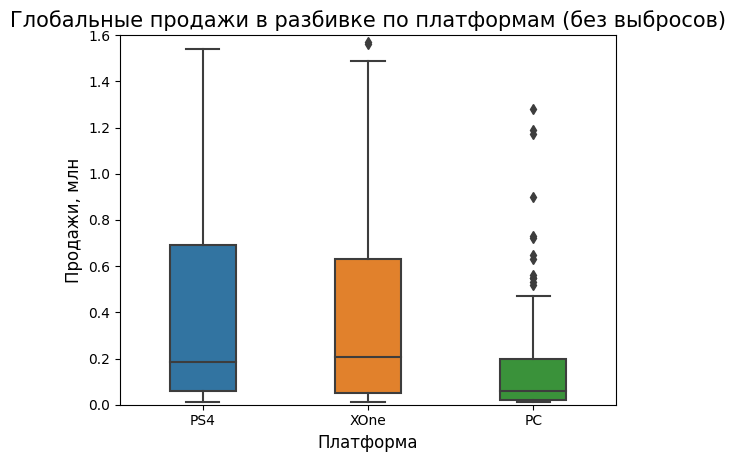

In [25]:
seaborn.boxplot(
    y='total_sales', x='platform', 
    data=data.query('(platform in ["PS4", "XOne", "PC"])'), 
    width= 0.4)
plt.xlabel("Платформа", fontsize= 12)
plt.ylabel("Продажи, млн", fontsize= 12)
plt.ylim(0, 1.6)
plt.title("Глобальные продажи в разбивке по платформам (без выбросов)", fontsize= 15)
plt.show()

На графике видно, что для у платформы XOne медиана расположена выше, значит, половина всех игр на этой платформе имеют продажи выше, чем у других платформы. Высота боксплота выше у PS4, то есть игры на данной платформе сильнее отличаются между собой по уровню продаж. У платформы PC самый небольшой разброс по уровню продаж, и сами продажи заметно ниже, чем у двух других платформ. Ниже рассмотрим диаграммы с учетом выбросов - игр-хитов.

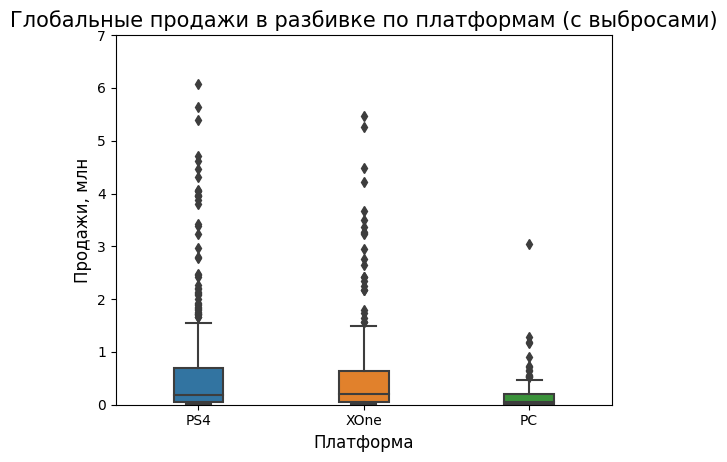

In [26]:
seaborn.boxplot(
    y='total_sales', x='platform', 
    data = data.query('(platform in ["PS4", "XOne", "PC"])'), 
    width= 0.3)
plt.xlabel("Платформа", fontsize= 12)
plt.ylabel("Продажи, млн", fontsize= 12)
plt.ylim(0, 7)
plt.title("Глобальные продажи в разбивке по платформам (с выбросами)", fontsize= 15)
plt.show()

Мы видим, что продажи игр-хитов на платформе PS4 выше, чем на платформах XOne и PC. Эту информацию так же можно использовать при планировании продаж на следующий год.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

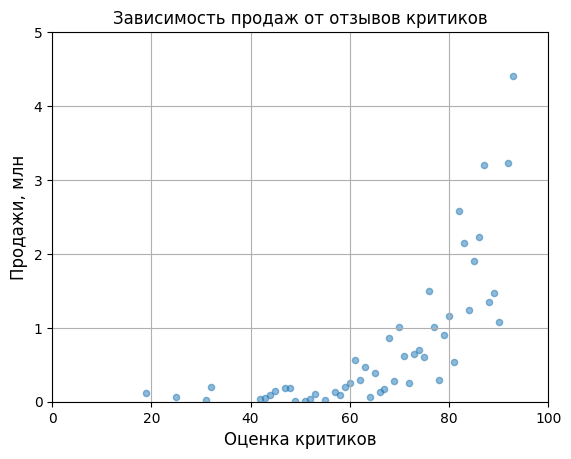

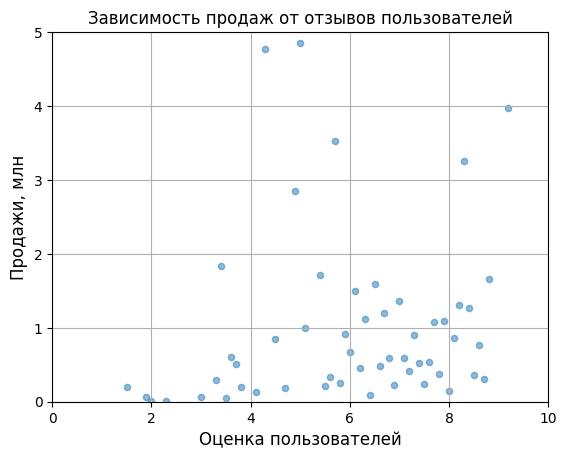

In [27]:
# запишем в переменную название платформы, по которой хотим посмотреть данные
platform = 'PS4'

# построим график зависимости продаж от отзывов критиков
(
data.query('platform == @platform').pivot_table(index='critic_score', values='total_sales').reset_index()
    .plot(x='critic_score', y='total_sales', kind='scatter', \
          title='Зависимость продаж от отзывов критиков', alpha=0.5, xlim=(0, 100), ylim=(0, 5), grid=True)
)
plt.xlabel("Оценка критиков", fontsize= 12)
plt.ylabel("Продажи, млн", fontsize= 12)
plt.show()

# построим график зависимости продаж от отзывов пользователей
(
data.query('platform == @platform').pivot_table(index='user_score', values='total_sales').reset_index()
    .plot(x='user_score', y='total_sales', kind='scatter', \
          title='Зависимость продаж от отзывов пользователей', alpha=0.5, xlim=(0, 10), ylim=(0, 5), grid=True)
)
plt.xlabel("Оценка пользователей", fontsize= 12)
plt.ylabel("Продажи, млн", fontsize= 12)
plt.show()

Посчитаем коэффициент корреляции между этими величинами.

In [28]:
print(data[(~data['critic_score'].isna())]['critic_score'].corr(data['total_sales']))
print(data[(~data['user_score'].isna())]['user_score'].corr(data['total_sales']))

0.3281050869663633
-0.01307030500248457


На графике зависимости продаж от отзывов критиков прослеживается определенная связь. Причем, эта связь не линейная, а экспоненциальная. Чем выше оценки, тем выше продажи. При высоких оценках (от 80 баллов) скорость роста продаж выше, чем при средних. Связь продаж с оценками пользователей гораздо менее выражена, здесь больше выбросов, но тоже можно разглядеть рост продаж с увеличением оценок.

Проверим, как наши выводы соотносятся с данными по другим платформам. Построим график по двум другим платформам-лидерам.

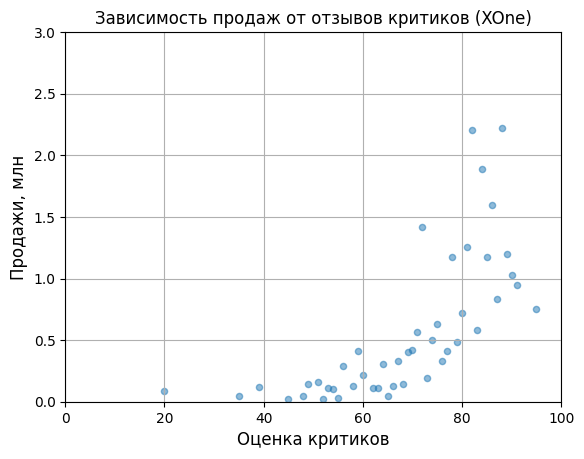

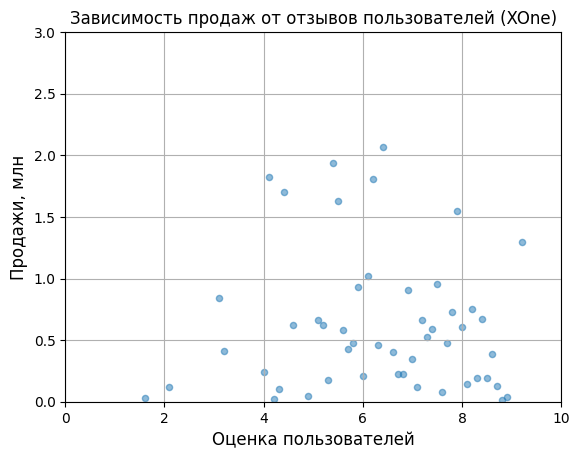

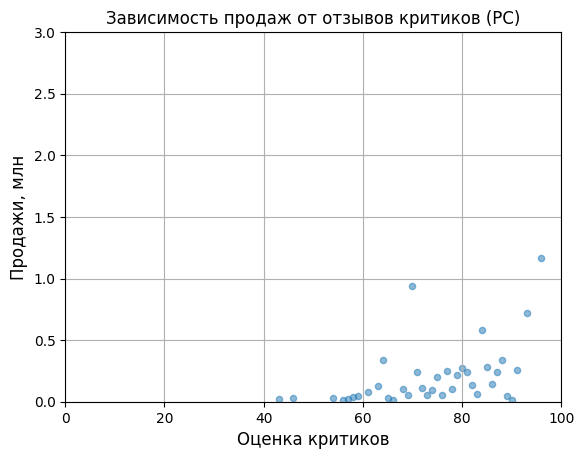

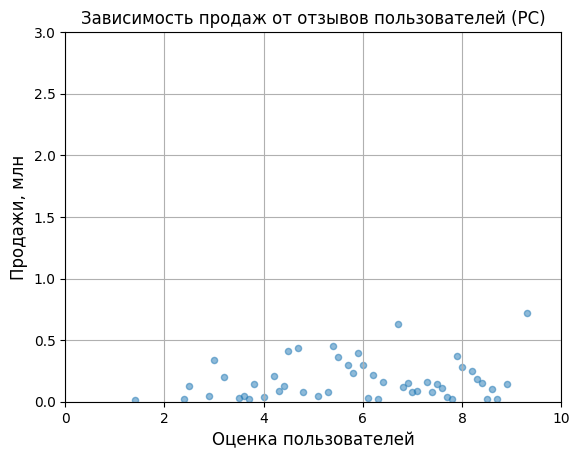

In [29]:
for p in ['XOne', 'PC']:
    # построим график зависимости продаж от отзывов критиков
    (
        data.query('platform == @p').pivot_table(index='critic_score', values='total_sales').reset_index()
        .plot(x='critic_score', y='total_sales', kind='scatter', \
          title='Зависимость продаж от отзывов критиков ('+p+')', alpha=0.5, xlim=(0, 100), ylim=(0, 3), grid=True)
    )
    plt.xlabel("Оценка критиков", fontsize= 12)
    plt.ylabel("Продажи, млн", fontsize= 12)
    plt.show()

    # построим график зависимости продаж от отзывов пользователей
    (
        data.query('platform == @p').pivot_table(index='user_score', values='total_sales').reset_index()
        .plot(x='user_score', y='total_sales', kind='scatter', \
          title='Зависимость продаж от отзывов пользователей ('+p+')', alpha=0.5, xlim=(0, 10), ylim=(0, 3), grid=True)
    )
    plt.xlabel("Оценка пользователей", fontsize= 12)
    plt.ylabel("Продажи, млн", fontsize= 12)
    plt.show()

Графики зависимости продаж от оценок критиков для двух платформ оказались похожими между собой и похожие на график для платформы PS4, а графики зависимости продаж от оценок пользователей отличаются: у XOne и PC такой зависимости нет.

Посмотрим на общее распределение игр по жанрам. Найдем самые прибыльные жанры. Выясним, выделяются ли жанры с высокими и низкими продажами

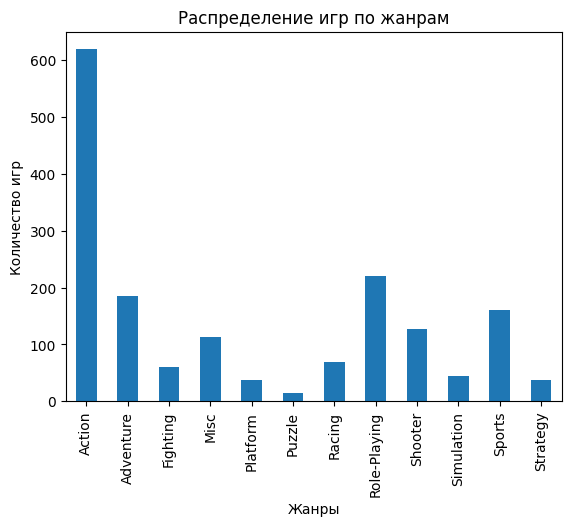

In [30]:
# построим график распределения игр по жанрам
(
    data.groupby(['genre']).agg({'name':'count'})#.sort_values(by='name')
    .plot(kind='bar', title='Распределение игр по жанрам', xlabel='Жанры', ylabel='Количество игр', legend=False)
)
plt.show()

На графике видно, что по количеству игр с большим отрывом лидирует жанр Action, затем идут игры в жанре RPG, а замыкает тройку самых популярных жанров Adventure. Наименьшее количество игры выходит в жанрах Puzzle, Strategy и Platform.

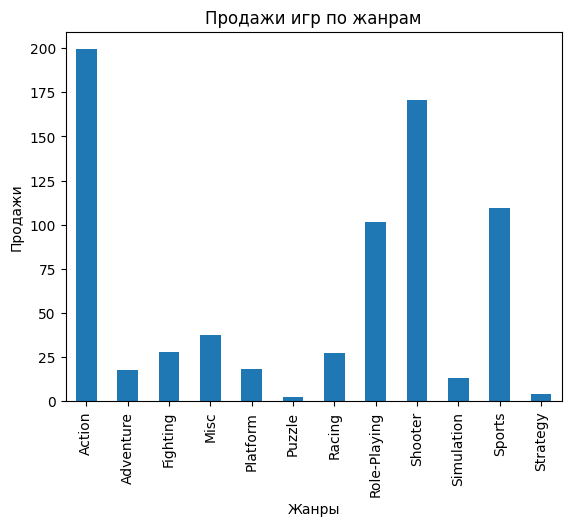

In [31]:
# посмотрим, игры каких жанров принесли больше всего продаж
(
    data.groupby(['genre']).agg({'total_sales':'sum'})#.sort_values(by='total_sales')
    .plot(kind='bar', title='Продажи игр по жанрам', xlabel='Жанры', ylabel='Продажи', legend=False)
)
plt.show()

График получился немного похожим на предыдущий, что вполне логично: большое количество игр определенного жанра суммарно принесет и больше продаж. На этом графике лидером, т.е. самым продаваемым жанром, является Action, за ним следуют игры в жанре Shooter, а на третьем месте - игры в стиле Sports. Хуже всего продаются игры в стиле Puzzle, Strategy и Simulation.

Теперь построим график продаж с поправкой на количество игр, выпущенных в одном жанре. То есть посчитаем, какие в среднем продажи приходятся на игру определенного жанра.

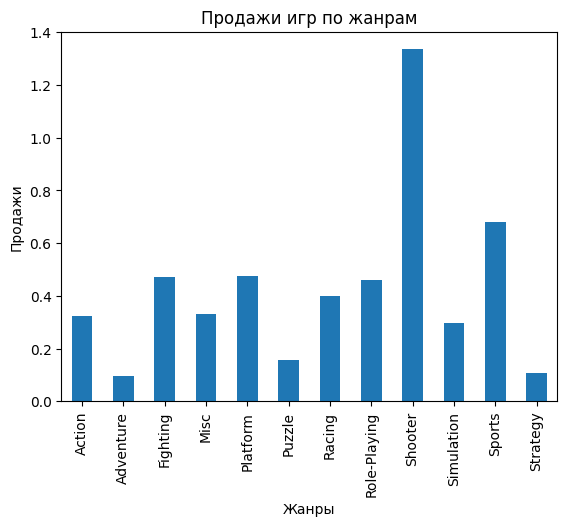

In [32]:
(
    data.groupby(['genre'])['total_sales'].mean()
    .plot(kind='bar', title='Продажи игр по жанрам', xlabel='Жанры', ylabel='Продажи', legend=False)
)
plt.show()

Мы видим, что на этом графике распределение игр по продажам в зависимости от жанра изменилось: лидерами являются такие жанры как Shooter (в предыдущем графике он также был в лидерах), Sports (тоже входил в тройку лидеров на прошлом графике). Зато самый популярный жанр Action, который был лидером по числу продаж в прошлом графике, сейчас находится только на 8-м месте. То есть игры этого жанра берут рынок, образно выражаясь, количеством, а не качеством: доля продаж, которая приходится на каждую игру этого жанра, ниже, чем у предыдущих 7 жанров, но за счет большого количества игр, выпускаемых в жанре Action, общие продажи у них самые высокие. А самые низкие продажи у жанров Adventure и Strategy.

### Составим портрет пользователя каждого региона

#### Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5). Опишем различия в долях продаж.

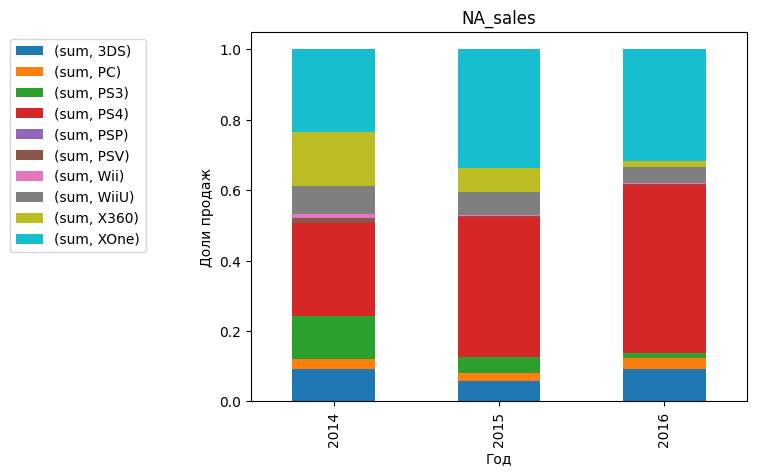

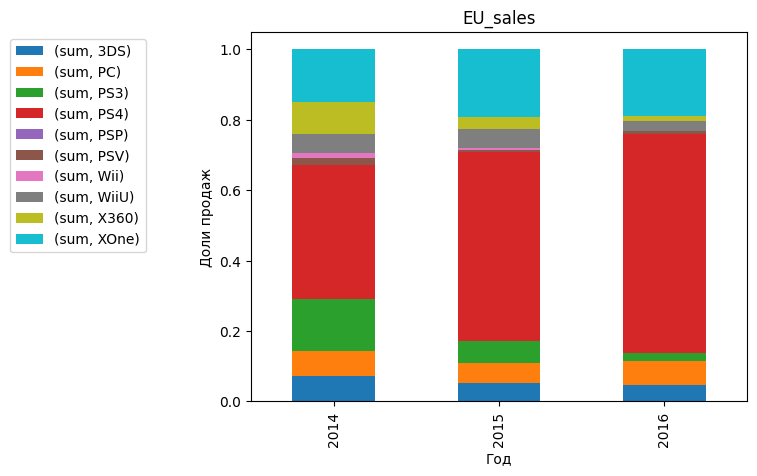

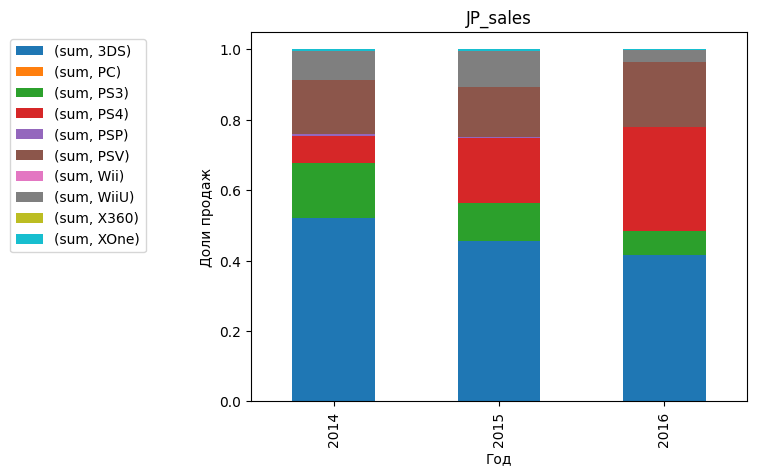

In [33]:
region_sales = ['NA_sales', 'EU_sales', 'JP_sales']

# для каждого региона посчитаем доли продаж по платформам и построим графики
for r in region_sales:
    # создадим датафрейм, в котором будем хранить продажи игр на всех платформах
    # за каждый год для конкретного региона
    by_year = data.groupby(['year_of_release']).agg({r:'sum'}) 

    # добавим к нашему основному датафрейму data данные по продажам за год из датафрейма by_year
    data = data.merge(by_year, on='year_of_release', suffixes=('', '_in_year'))
    #display(data)
    
    # добавим в датафрейм новую колонку, которая будет хранить долю продаж за год для каждой платформы
    # генерируем название для колонки
    column_name = str('share_'+r)
    data[column_name] = data[r] / data[str(r+'_in_year')]
    
    # строим график
    (
        data
        .pivot_table(index=['year_of_release'], columns=['platform'], values=column_name, aggfunc={'sum'})
        .plot.bar(stacked=True, title=r)
    )
    plt.legend(bbox_to_anchor=(-0.5, 1), loc='upper left', ncol=1)
    plt.xlabel('Год')
    plt.ylabel('Доли продаж')
    plt.show()

Получившиеся графики наглядно демонстрируют, что в каждом регионе есть свои популярные игровые платформы, на которые приходится большая доля продаж. 

В Северной Америке в последние годы наиболее востребованы игры на платформах PS4, 3DS. На третьем месте с большим отставанием от лидеров идет платформа XOne. Также в топ-5 вошли WiiU и PC.
В Европе по продажам в последние несколько лет так же лидируют PS4 и 3DS, а на третьем - в отличии от Северной Америки - игры на PC. Также в 5ку входят игры на платформе XOne и WiiU.
В Японии картина несколько иная: здесь наиболее популярны игры на платформах XOne и PS4. А популярная в других регионах платформа 3DS, судя по графику, в Японии вообще не представлена. Остальные платформы, которые попадают в топ-5 - PSV, PS3 и WiiU. То есть, из топ-5 платформ три - Play Station разных версий, что можно объяснить тем, что данные платформы производятся японской корпорацией Sony. Закономерно, что эти платформы широко распространены в самой Японии.

#### Определим для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5).

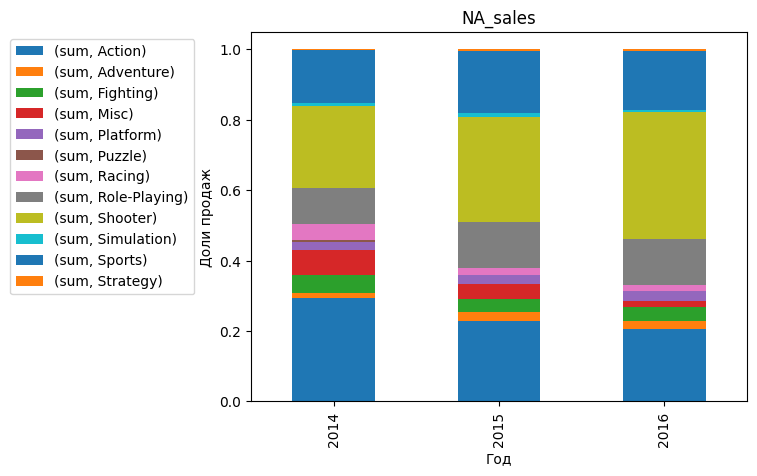

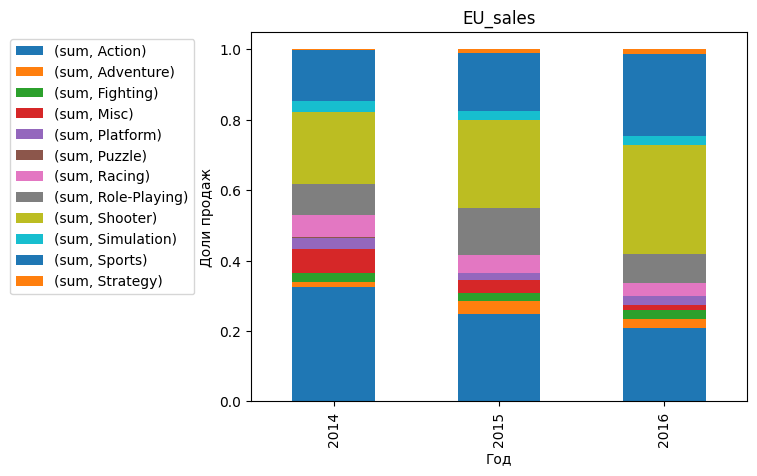

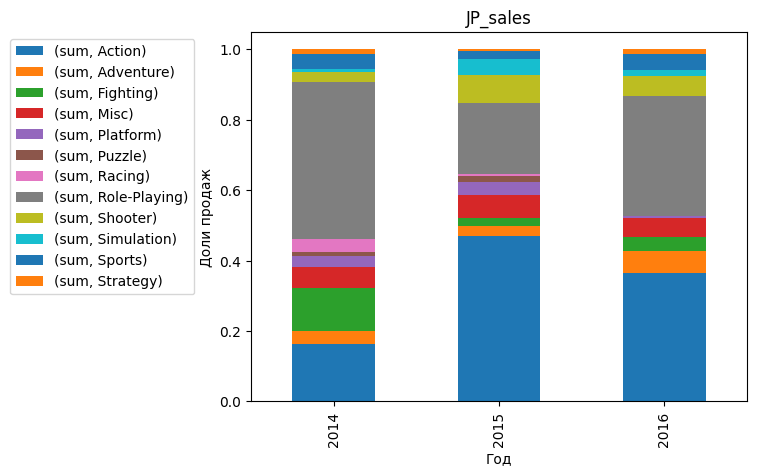

In [34]:
# для каждого региона посчитаем доли продаж по жанрам и построим графики
for r in region_sales:
    # генерируем название колонки
    column_name = str('share_'+r)    
    
    # строим график
    (
        data
        .pivot_table(index=['year_of_release'], columns=['genre'], values=column_name, aggfunc={'sum'})
        .plot.bar(stacked=True, title=r)
    )
    plt.legend(bbox_to_anchor=(-0.5, 1), loc='upper left', ncol=1)
    plt.xlabel('Год')
    plt.ylabel('Доли продаж')
    plt.show()

На графиках хорошо видны различия в предпочтениях игр определенных жанров пользователей из разных регионов.

В Северной Америке в топ-5 популярных жанров входят Shooter (причем, их популярность растет последние несколько лет), Sports (их популярность относительно других жанров, наоборот, снижается), Action, Role-Playing (интерес к этим жанрам держится примерно на одном уровне в последние годы) и Fighting. 

В Европе в последние годы также, как и в Северной Америке, набирают популярность игры в жанре Shooter, на втором месте идут игры в жанре Action, причем, в последние годы наблюдается рост интереса к этому жанру. На третьем месте - игры в жанре Sports, с тенденцией к снижению доли продаж относительно других жанров, как и в Северной Америке. Замыкают топ-5 жанры Role-Playing и Racing.

В Японии же предпочтения пользователей несколько отличаются от других регионов. Самыми популярными жанрами там являются Role-Playing и Sports, именно на эту парочку приходится львиная доля всех продаж. Остальные жанры, такие как Shooter, Misc (видимо, имеет своих поклонников в Японии, так как продажи по ним держутся примерно на одном уровне последние 5 лет, в отличии от других регионов, где они снижаются), Action и Strategy (этот жанр не вошел в топ-5 ни в Северной Америке, ни в Европе), имеют примерно одинаковую долю продаж.

Возможно, такие различия связаны с тем, что для популярных на японском рынке игровых платформ больше игр выпускается именно по озвученным выше игровым жанрам: Role-Playing и Sports. А по распространенным на западном рынке жанрам - Shooter и Action - игр на популярных в Японии платформах выпускается, соответсвенно, меньше. Что, естественно, сказывается на продажах: ведь пользователи покупают продукт, который разработан для их игровой платформы.

#### Выясним, влияет ли рейтинг ESRB на продажи в отдельном регионе

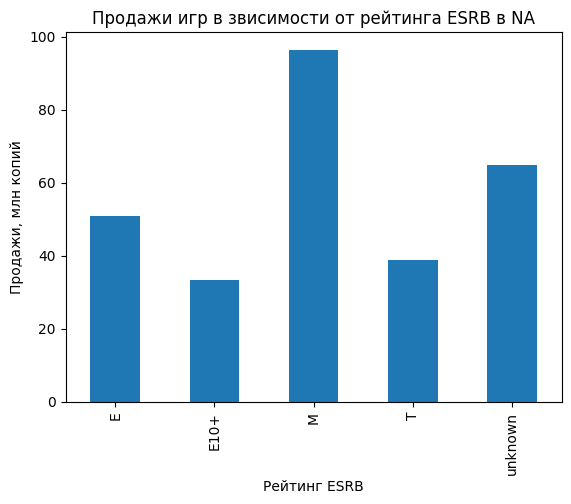

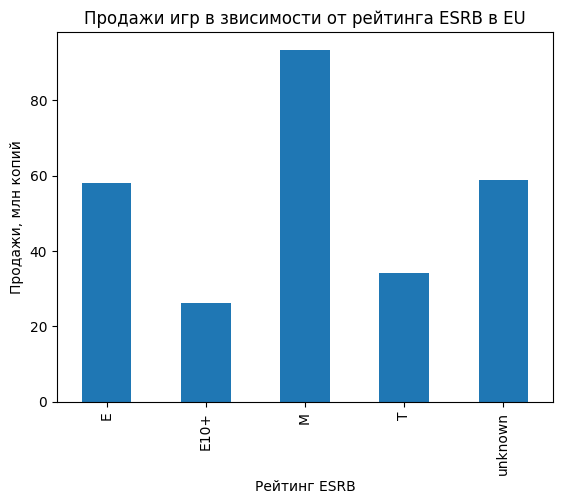

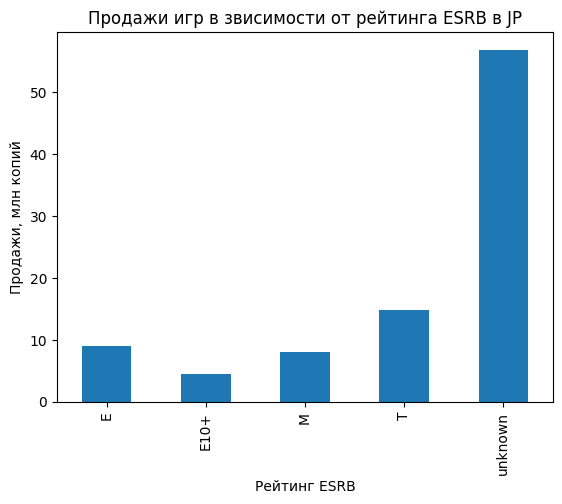

In [35]:
for r in region_sales:
    (
    data.pivot_table(index=['rating'], values=r, aggfunc='sum')
    .plot(kind='bar', title='Продажи игр в звисимости от рейтинга ESRB в '+r[0:2], 
          xlabel='Рейтинг ESRB', ylabel='Продажи, млн копий', legend=False)
    )
plt.show()

Данные графики позволяют нам сделать выводы, что в Северной Америке и Европе продажи игр в зависимости от рейтинга имеют одинковое распределение: лидером продаж там являются игры с рейтингом «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.
На втором месте по популярности идут игры с неопределенным рейтингом. На третьем месте - игры с рейтингом «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера.
На японском рынке ситуация несколько иная: наибольшие продажи там имеют игры с неизвестным рейтингом. Игры с рейтингом «E» («Everyone») занимают второе место по популярности, а третье - игры с рейтингом «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.

Таким образом, можно сделать выводы, что в Северной Америке и Европе основными потребителями игр являются взрослые люди, а в Японии - дети и подростки. Также обращает внимание тот факт, что большую популярность имеют игры без рейтинга. В Японии они занимают первое место. Возможно, это связано с тем, что эти игры имеют другую классификацию, которая применяется на японском рынке игр (CERA), либо с тем, что информация по данным играм по какой-то причине загрузилась в датасет некорректно. 

### Проверим гипотезы

#### Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

```
H_0: Средний пользовательский рейтинг платформы Xbox One = средний пользовательский рейтинг платформы PC`
H_a: Средний пользовательский рейтинг платформы Xbox One ≠ средний пользовательский рейтинг платформы PC`
alpha = 0.05
```

In [36]:
from scipy import stats as st

In [37]:
array_user_score_XOne = data[(data['platform'] =='XOne') & ~(data['user_score'].isna())]['user_score']
array_user_score_PC = data[(data['platform'] =='PC') & ~(data['user_score'].isna())]['user_score']

# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    array_user_score_XOne, 
    array_user_score_PC,
    equal_var=False)

# alpha = зададим значение уровня значимости
alpha = 0.05

# вывод значения p-value на экран 
print(results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.11601398086668835
Не получилось отвергнуть нулевую гипотезу


In [38]:
print(data[(data['platform'] =='XOne') & ~(data['user_score'].isna())]['user_score'].mean())
print(data[(data['platform'] =='PC') & ~(data['user_score'].isna())]['user_score'].mean())

6.594545454545456
6.298360655737705


Действительно, средние пользовательские рейтинги данных платформ довольно близки по значению.

#### Проверка гипотезы: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

```
H_0: Средний пользовательский рейтинг жанра Action = средний пользовательский рейтинг жанра Sports`
H_a: Средний пользовательский рейтинг жанра Action ≠ средний пользовательский рейтинг жанра Sports`
alpha = 0.05
```

In [39]:
array_user_score_Action = data[(data['genre'] =='Action') & ~(data['user_score'].isna())]['user_score']
array_user_score_Sports = data[(data['genre'] =='Sports') & ~(data['user_score'].isna())]['user_score']

# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    array_user_score_Action, 
    array_user_score_Sports,
    equal_var=False)

# alpha = зададим значение уровня значимости
alpha = 0.05

# вывод значения p-value на экран 
print(results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.1825550382644643e-14
Отвергаем нулевую гипотезу


In [40]:
print(data[(data['genre'] =='Action') & ~(data['user_score'].isna())]['user_score'].mean())
print(data[(data['genre'] =='Sports') & ~(data['user_score'].isna())]['user_score'].mean())

6.760606060606061
5.2251968503937


Действительно, в этом случае мы получили отличающиеся значения пользовательских рейтингов для жанров экшн и спорт

За нулевую гипотезу всегда принимается гипотеза об отсутствии различий. В нашем случае это гипотеза о равенстве средних для двух выборок. Альтернативная ей гипотеза - это гипотеза, которая принимается верной, если отбрасывается нулевая гипотеза. В нашем случае альтернативная гипотеза определяется как неравенство средних двух выборок. 
После того, как мы сформулировали гипотезы, остается на основе данных сделать выбор: отклонить нулевую в пользу альтернативной или нет. Для этого нужно посчитать вероятность получить наблюдаемое на выборке значение при условии, что нулевая гипотеза верна. Если такая вероятность большая - отвергать нулевую гипотезу не стоит. 
Для того, чтобы определить, когда еще не стоит отвергать нулевую гипотезу, а когда уже пора, используют уровень значимости проверки гипотезы. Он определяет, где проходит граница вероятности попасть слишком далеко от центра распределения. 
Для проверки гипотез в обоих заданиях мы использовали тест ttest_ind(). Данный метод возвращает 2 числа: статистику разности и уровень значимости для статистики разности - p-value. Полученное значение p-value мы затем сравниваем с alpha (критический уровень статистической значимости). В нашем случае мы задали alpha = 0.05. При p-value меньше alpha мы отвергаем нулевую гипотезу, в противном случае мы не можем ее опровергнуть.
В первом задании p-value получили равным 0.5535080500643661. Оно больше alpha, следовательно, мы не смогли отвергнуть нулевую гипотезу.
Во втором задании p-value получилось очень маленьким, меньше alpha, следовательно, мы имеем основание отвергнуть нулевую гипотезу.


### Общие выводы

Мы произвели обзор данных и первоначальное знакомство с датасетом. Проверили данные на явные дубликаты, изменили названия столбцов, их типы данных (согласно значениям, которые в них хранятся), обработали пропуски, добавили новые колонки. Затем  перешли к исследовательскому анализу данных. 

Изучили, сколько игр выпускалось в разные годы, и определили, что большой рост числа выпускаемых в год компьютерных игр пришелся на начало двухтысячных, с пиком в 2008-2009 годы. Затем количество выпускаемых игр пошло на спад, причем, резкий спад прозошел в 2012 году, после чего число выпускаемых в год игр ощутимо не менялось, т.е. стабилизировалось на уровне около 550 игр в год. 

Посмотрели, как менялись продажи по платформам и выяснили, как меняется доля продаж игр на разных платформах в течение нескольких лет и как одни платформы, более современные, приходят на смену другим, устаревшим, платформам. Например, популярная в начале двухтысячных платформа PS2 через 10 лет практически полностью вытеснилась своей усовершенствованной версией PS3, которую, в свою очередь, вытеснила еще более современная платформа PS4. Мы определили, что средний "возраст" игровых платформ - около 7 лет. Также выявили платформу-долгожителя - это PC (компьютер) - она существует на протяжении всех лет, по которым мы проводили исследование. Что вполне согласуется с реальными данными, ведь компьютер - самая распространенная игровая платформа, и для нее всегда выпускаются и, скорее всего, будут выпускаться компьютерные игры.

Также мы определили платформы-лидеры с наибольшими суммарными продажами. Это PS4, XOne, 3DS, PS3, X360. Доли продаж по ним с течением времени меняется: какие-то из них увеличивают долю на рынке и набирают популярность, а какие-то, наоборот, устаревают и уступают место более современным продуктам. К потенциально прибыльным платформам отнесли XOne и PS4.

По данным за последние 3 года наибольшие продажи наблюдались у игр на платформе XOne, которая сменила свою не менее популярную в прошлые годы X360.

При помощи графиков выяснили, что для игр на платформе PS4 между отзывами критиков и продажами существует связь. Причем, эта связь не линейная, а экспоненциальная. Чем выше оценки, тем выше продажи. При высоких оценках критиков (от 80 баллов) скорость роста продаж выше, чем при средних. Зависимость продаж от оценок пользователей не такая сильная. И имеет место не для всех платформ.

Посмотрели на общее распределение игр по жанрам. По количеству игр с большим отрывом лидирует жанр Action, затем идут игры в жанре RPG, а замыкает тройку самых популярных жанров Adventure. Наименьшее количество игры выходит в жанрах Puzzle, Strategy и Platform. Нашли самые прибыльные жанры. Для этого мы посчитали, какие в среднем продажи приходятся на игру определенного жанра. В лидеры вышли такие жанры как Shooter, Sports. Зато самый популярный жанр Action оказался только на 8-м месте. То есть игры этого жанра берут рынок, образно выражаясь, количеством, а не качеством: доля продаж, которая приходится на каждую игру этого жанра, ниже, чем у предыдущих 7 жанров, но за счет большого количества игр, выпускаемых в жанре Action, общие продажи у них самые высокие. А самые низкие продажи у жанров Adventure и Strategy.

Определили для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5). Выяснили, что в Северной Америке в последние годы наиболее востребованы игры на платформах PS4, 3DS. На третьем месте с большим отставанием от лидеров идет платформа XOne. Также в топ-5 вошли WiiU и PC. В Европе по продажам в последние несколько лет так же лидируют PS4 и 3DS, а на третьем - в отличии от Северной Америки - игры на PC. Также в 5ку входят игры на платформе XOne и WiiU. В Японии картина несколько иная: здесь наиболее популярны игры на платформах XOne и PS4. А популярная в других регионах платформа 3DS, судя по графику, в Японии вообще не представлена. Остальные платформы, которые попадают в топ-5 - PSV, PS3 и WiiU. То есть, из топ-5 платформ три - Play Station разных версий, что можно объяснить тем, что данные платформы производятся японской корпорацией Sony. Закономерно, что эти платформы широко распространены в самой Японии.

Определили для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5). В Северной Америке в топ-5 популярных жанров входят Shooter (причем, их популярность растет последние 4 года), Sports (их популярность относительно других жанров, наоборот, снижается), Action, Role-Playing (интерес к этим жанрам держится примерно на одном уровне в последние годы) и Fighting. В Европе в последние годы также, как и в Северной Америке, набирают популярность игры в жанре Shooter, на втором месте идут игры в жанре Action, причем, в последние годы наблюдается рост интереса к этому жанру. На третьем месте - игры в жанре Sports, с тенденцией к снижению доли продаж относительно других жанров, как и в Северной Америке. Замыкают топ-5 жанры Role-Playing и Racing. В Японии же предпочтения пользователей несколько отличаются от других регионов. Самыми популярными жанрами там являются Role-Playing и Sports, именно на эту парочку приходится львиная доля всех продаж. Остальные жанры, такие как Shooter, Misc, Action и Strategy (этот жанр не вошел в топ-5 ни в Северной Америке, ни в Европе), имеют примерно одинаковую долю продаж.
Возможно, такие различия связаны с тем, что для популярных на японском рынке игровых платформ больше игр выпускается именно по озвученным выше игровым жанрам: Role-Playing и Sports. А по распространенным на западном рынке жанрам - Shooter и Action - игр на популярных в Японии платформах выпускается, соответсвенно, меньше. Что, естественно, сказывается на продажах: ведь пользователи покупают продукт, который разработан для их игровой платформы. Также не следует исключать причины, зависящие от культурных различий и предпочтений.

Также мы исследовали, как влияет ли рейтинг ESRB на продажи в отдельном регионе, и пришли к выводу, что в Северной Америке и Европе продажи игр в зависимости от рейтинга имеют одинковое распределение: лидером продаж там являются игры с рейтингом «M» («Mature») — «Для взрослых». На втором месте по популярности идут игры с неопределенным рейтингом. На третьем месте по популярности идут игры с рейтингом «E» («Everyone») — «Для всех». На японском рынке ситуация несколько иная: наибольшие продажи там имеют игры с неизвестным рейтингом, на втором месте - игры с рейтингом «E» («Everyone»), а на третьем - игры с рейтингом «T» («Teen») — «Подросткам». Можно сделать выводы, что в Северной Америке и Европе основными потребителями игр являются взрослые люди, а в Японии - дети и подростки. А тот факт, что большую популярность имеют игры без рейтинга (в Японии они занимают первое место), возможно, это связан с тем, что эти игры имеют другую классификацию, которая применяется на японском рынке игр, либо с тем, что информация по данным играм по какой-то причине загрузилась в датасет некорректно.
Полученные в результате наших исследований сведения можно использовать при планировании продаж и рекламных компаний на предстоящий год.

Также мы проверили 2 гипотезы. Для проверки гипотез в обоих заданиях мы использовали тест ttest_ind(), который как раз применяется при проверки гипотез о равенстве средних двух генеральных совокупностей. Данный метод возвращает 2 числа: статистику разности и уровень значимости для статистики разности - p-value. Полученное значение p-value мы затем сравнивали с alpha (критический уровень статистической значимости). В нашем случае мы задали alpha = 0.05. При p-value меньше alpha мы отвергаем нулевую гипотезу, в противном случае мы не можем ее опровергнуть. В первом задании p-value получили равным 0.5535080500643661. Оно больше alpha, следовательно, мы не смогли отвергнуть нулевую гипотезу. Во втором задании p-value получилось очень маленьким, меньше alpha, следовательно, мы имеем основание отвергнуть нулевую гипотезу.